### Housing Price Estimation

Here, we will train a machine learning model to predict housing price based on its total area (in sq ft). We will use univariate linear regression to train the model.
- **Feature**: Area of house (measured in square foot)
- **Target**: Price of the house (in $)

The feature values will be normalized using `z-score normalization`.
We will follow the `90-10` rule for segregating the dataset into training and validation sets i.e., 90% of the data will be used for training the model and 10% of the dataset will be used for validating the trained model.

**Note:** Model has been trained with L2-regularization to avoid overfitting.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from models import LinearRegression
from utils import Normalization

df = pd.read_csv('./datasets/housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
total_rows = df.shape[0]
train_rows = math.ceil(0.9 * total_rows)
training_set = df[:train_rows]
validation_set = df[train_rows:]
print(f"There are {training_set.shape[0]} row(s) in the training set.")
print(f"There are {validation_set.shape[0]} row(s) in the validation set.")

There are 491 row(s) in the training set.
There are 54 row(s) in the validation set.


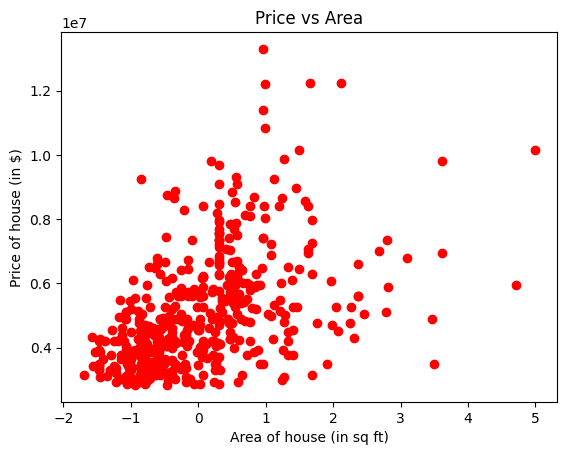

In [3]:
x_train = training_set['area'].to_numpy(dtype=float)
y_train = training_set['price'].to_numpy(dtype=float)
m = training_set.shape[0]
n = 1
x_train = x_train.reshape((m, n))
y_train = y_train.reshape((m, 1))
x_norm = Normalization.zscore(x_train)

plt.plot(x_norm, y_train, 'ro')
plt.title("Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.show()

Model parameters: w = [[701126.78565791]], b = 4076360.729702264 | Minimum cost value = 3,712,164,146,946.5557


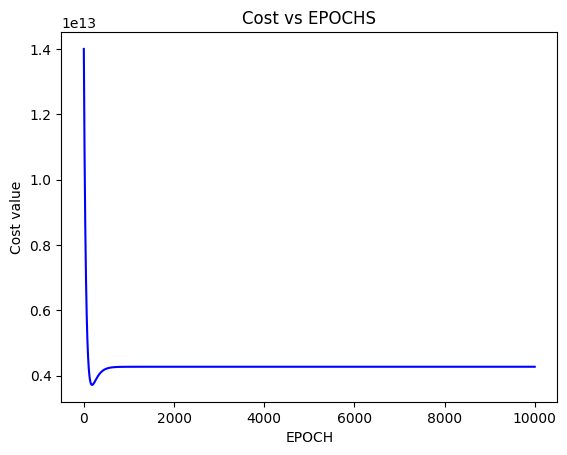

In [4]:
np.random.seed(20)
model = LinearRegression(0.009, 10000, 8.3)
cost_values = model.train_gd(x_norm, y_train)
print(f"Model parameters: w = {model.w_final}, b = {model.b_final} | Minimum cost value = {model.cost_final:,}")

plt.plot(cost_values, 'b')
plt.title("Cost vs EPOCHS")
plt.xlabel("EPOCH")
plt.ylabel("Cost value")
plt.show()

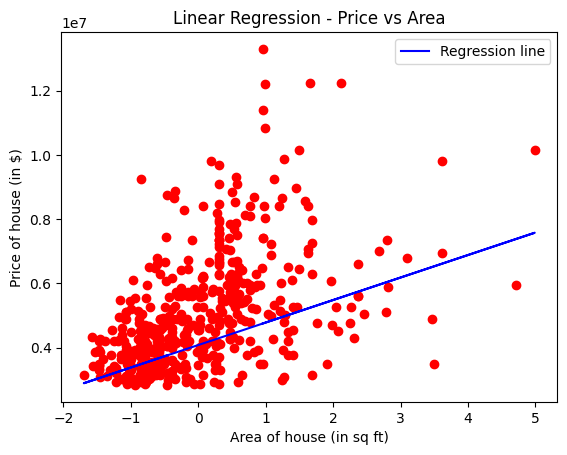

In [5]:
y_pred_hat = np.dot(x_norm, model.w_final) + model.b_final

plt.plot(x_norm, y_train, 'ro')
plt.plot(x_norm, y_pred_hat, 'b', label='Regression line')
plt.title("Linear Regression - Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.legend()
plt.show()

In [6]:
x_validate = validation_set['area'].to_numpy(dtype=float)
y_validate = validation_set['price'].to_numpy(dtype=float)
m_validate = validation_set.shape[0]
n_validate = 1
x_validate = x_validate.reshape((m_validate, n_validate))
y_validate = y_validate.reshape((m_validate, 1))
xv_norm = Normalization.zscore(x_validate)

cost_validate = model.validate(xv_norm, y_validate)
print(f"The minimum cost obtained from training set is {model.cost_final:,}")
print(f"The cost value obtained from validation set is {cost_validate:,}.")

if cost_validate > model.cost_final:
    percent_increase = ((cost_validate / model.cost_final) * 100) - 100
    print(f"Validation cost is {percent_increase:.2f}% higher than the training cost.")
else:
    percent_increase = ((model.cost_final / cost_validate) * 100) - 100
    print(f"Training cost is {percent_increase:.2f}% higher than the validation cost.")

The minimum cost obtained from training set is 3,712,164,146,946.5557
The cost value obtained from validation set is 3,730,045,760,791.959.
Validation cost is 0.48% higher than the training cost.


In [7]:
final_pred = model.predict(xv_norm)
m_final = final_pred.shape[0]
final_pred = final_pred.reshape((m_final, 1))
for i in range(math.floor(m_final/2)):
    print(f"y = {y_validate[i, 0]:,}, y_hat = {final_pred[i, 0]:,}")

y = 2,835,000.0, y_hat = 3,541,775.721545944
y = 2,800,000.0, y_hat = 3,548,533.9072981253
y = 2,800,000.0, y_hat = 4,433,856.24083384
y = 2,730,000.0, y_hat = 6,353,180.994453253
y = 2,730,000.0, y_hat = 4,460,888.983842565
y = 2,695,000.0, y_hat = 4,460,888.983842565
y = 2,660,000.0, y_hat = 4,416,284.95787817
y = 2,660,000.0, y_hat = 3,109,251.833406358
y = 2,660,000.0, y_hat = 4,210,836.1110118665
y = 2,660,000.0, y_hat = 3,649,906.6935808407
y = 2,660,000.0, y_hat = 3,399,853.8207501424
y = 2,660,000.0, y_hat = 4,109,463.3247291506
y = 2,660,000.0, y_hat = 4,460,888.983842565
y = 2,653,000.0, y_hat = 3,910,096.84503981
y = 2,653,000.0, y_hat = 4,460,888.983842565
y = 2,604,000.0, y_hat = 3,724,246.7368548317
y = 2,590,000.0, y_hat = 4,190,561.553755323
y = 2,590,000.0, y_hat = 4,731,216.413929805
y = 2,590,000.0, y_hat = 4,190,561.553755323
y = 2,520,000.0, y_hat = 3,703,972.1795982886
y = 2,520,000.0, y_hat = 3,906,717.75216372
y = 2,520,000.0, y_hat = 3,785,070.408624461
y = 2,4